# Goal: do something that features or at least showcases the different columns

# Misc details
+ code to make everything link
    + need of vps and database axis
    + discussion of pickle-necessity
+ Cut-off date of June 1st 2016
+ Which languages chose - ask Julia again

## Previous research
+ Current WMF (Swati Goel) [reference](http://paws-public.wmflabs.org/paws-public/User:Swagoel/ThanksAnalysis/ProjectNotes/ResultsDiscussion.txt)
    + Observational analysis On fiwiki, kowiki, hiwiki.
       - thank typically goes from less experienced to more experience.
       - Thanks given and received is log-distributed
+ Nemoto Note 2015 [reference](https://arxiv.org/pdf/1502.04312.pdf)
    + Observational Cultural differences in 7 wikis
        + There tend to be more unique recipients than senders.
        + Thanks generall go "up", in both dimensions, total edits and length of tenure.
        + See some, maybe not signficant effects that thanking  *decreases* edits days after.
        

Want to do a regression between spe and re1*, and spe and rtha. That is, is the more experienced the send that you gave you thank, the more you went to edit or thank more after? (Does who's thanking you make a difference?) (Otherwise we could just use a bot). 

In [1]:
#load 
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
df = pd.read_feather('transfer/gratitude_20180814.feather')
#df = pd.read_csv('transfer/gratitude_20180813.csv')

In [7]:
df.memory_usage().sum() * 0.000001 # in megs

881.605654

In [8]:
df.columns

Index(['lang', 'timestamp', 'gratitude', 'receiver', 'sender', 'receiver_id',
       'sender_id', 'wll_type', 'probably_deleted', 'receiver_prev_edits',
       'receiver_prev_received', 'receiver_prev_received_indicator',
       'receiver_prev_sent', 'receiver_prev_sent_indicator',
       'receiver_edits_1d_after', 'receiver_edits_30d_after',
       'receiver_edits_90d_after', 'receiver_edits_180d_after',
       'receiver_gratitude_another_1d_after',
       'receiver_gratitude_another_30d_after',
       'receiver_gratitude_another_90d_after',
       'receiver_gratitude_another_180d_after', 'receiver_first_edit',
       'sender_prev_edits', 'sender_prev_received',
       'sender_prev_received_indicator', 'sender_prev_sent',
       'sender_prev_sent_indicator', 'sender_edits_1d_after',
       'sender_edits_30d_after', 'sender_edits_90d_after',
       'sender_edits_180d_after', 'sender_first_edit'],
      dtype='object')

## Columns documentation

### Descriptions
- `lang`: the language of the wikipedia [as code](https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes).
- `timestamp` : when the gratitude occured, UTC
- `gratitude` : the gratidue type, either `'thank'` or `'love'`
- `receiver`: who received the gratitude. a username for thank, and userid for love
- `sender`: who sent the gratitude. a username for thank, and userid for love
- `receiver_id`: user id of who received the gratitude, identical to receiver for love
- `sender_id`: user id of who sent the gratitude, identical to receiver for love
- `wll_type`: the type of wikilove that was sent. null for thank
- `probably_deleted`: if the user_id recorded didn't have any other history, in other tables, the account was probably deleted for some reason.
### Previous user actions
#### receiver
- `receiver_prev_edits` : the number of edits the receiver made prior to this gratitude
- `receiver_prev_received` : the number of same-type gratitudes received prior to this gratitude (i.e. number of thanks received before this thanks, or love received befor this love, NOT total gratitudes before this gratitude)
- `receiver_prev_received_indicator` : binary indicator of whether receivier ever received same-type gratitude
- `receiver_prev_sent` : the number of same-type gratitudes sent by receiver prior to this gratitude
- `receiver_prev_sent_indicator` : binary indicator of whether receiver ever sent same-type gratitude
- `receiver_first_edit`: the datetime when user made their first edit
#### sender
- `sender_prev_edits` : the number of edits the sender made prior to this gratitude
- `sender_prev_sended` : the number of same-type gratitudes sent prior to this gratitude (i.e. number of thanks sent before this thanks, or love sent befor this love, NOT total gratitudes before this gratitude)
- `sender_prev_sent_indicator` : binary indicator of whether sender ever sent same-type gratitude
- `sender_prev_sent` : the number of same-type gratitudes sent by sender prior to this gratitude
- `sender_prev_sent_indicator` : binary indicator of whether sender ever sent same-type gratitude
- `sender_first_edit`: the datetime when user made their first edit
### Future user actions
#### receiver
- `receiver_edits_1d_after` : the number of edits the receiver made 1 day after this gratitude
- `receiver_edits_30d_after` : the number of edits the receiver made 30 days after this gratitude
- `receiver_edits_90d_after` : the number of edits the receiver made 90 days after this gratitude
- `receiver_edits_180d_after` : the number of edits the receiver made 180 days after this gratitude
- `receiver_gratitude_another_1d_after` : the number of same-type gratitudes receiver makes to another user 1 day after this gratitude
- `receiver_gratitude_another_30d_after` : the number of same-type gratitudes receiver makes to another user 1 day after this gratitude
- `receiver_gratitude_another_90d_after` : the number of same-type gratitudes receiver makes to another user 1 day after this gratitude
- `receiver_gratitude_another_180d_after` : the number of same-type gratitudes receiver makes to another user 1 day after this gratitude
#### sender
- `sender_edits_1d_after` : the number of edits the sender made 1 day after this gratitude
- `sender_edits_30d_after` : the number of edits the sender made 30 days after this gratitude
- `sender_edits_90d_after` : the number of edits the sender made 90 days after this gratitude
- `sender_edits_180d_after` : the number of edits the sender made 180 days after this gratitude


# Summary Statistics

In [9]:
df.shape

(3849806, 33)

## Languages sizes

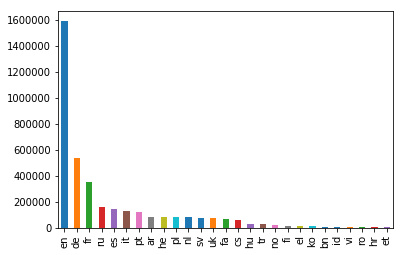

In [10]:
df['lang'].value_counts().plot(kind='bar')

In [11]:
df['lang'].value_counts()

en    1589088
de     539719
fr     351491
ru     161883
es     144951
it     132220
pt     124073
ar      84773
he      84002
pl      80982
nl      80966
sv      78318
uk      74772
fa      69617
cs      65119
hu      34266
tr      31042
no      25705
fi      13814
el      13367
ko      13190
bn      11568
id      11208
vi      11048
ro      10748
hr       7017
et       4859
Name: lang, dtype: int64

In [12]:
df['lang'].value_counts().shape

(27,)

In [34]:
lang_grat = df.groupby(['lang','gratitude']).agg({'timestamp':len}).sort_values(by='timestamp', ascending=False).rename(mapper={'timestamp':'observations'}, axis='columns')

In [35]:
lang_grat

,,observations
lang,gratitude,
en,thank,1472544
de,thank,539719
fr,thank,351491
ru,thank,161883
es,thank,138963
it,thank,132220
pt,thank,116667
en,love,116544
pl,thank,80982


## Gratitude Types, split

In [36]:
df['gratitude'].value_counts()

thank    3685914
love      163892
Name: gratitude, dtype: int64

In [37]:
month_counts = df['timestamp'].apply(lambda x: (x.year, x.month)).value_counts()

## Temporal density

In [38]:
month_counts_sorted = month_counts.sort_index()

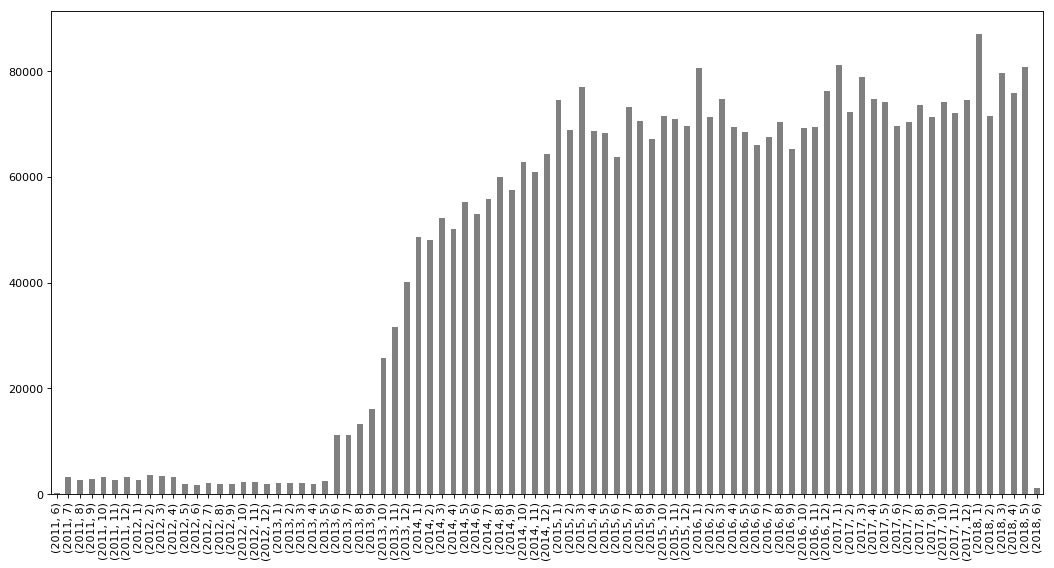

In [39]:
figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
month_counts_sorted.plot(kind='bar', color='grey')

## Top Wikilove type by language

In [40]:
#wll_type
lang_wll = df[['lang','wll_type','timestamp']].groupby(['lang', 'wll_type']).count()

In [41]:
g = lang_wll['timestamp'].groupby(level=0, group_keys=False)

In [42]:
g.nlargest(1)

lang  wll_type         
ar    barnstar-original     2101
bn    makeyourown             42
en    makeyourown          19053
es    makeyourown           3160
fa    makeyourown           1128
he    makeyourown            810
hu    makeyourown            156
ko    barnstar-original      345
no    makeyourown            166
pt    makeyourown           1207
sv    makeyourown            991
tr    barnstar-original      576
uk    makeyourown            332
vi    barnstar-original      198
Name: timestamp, dtype: int64

## Percentage probably deleted

In [43]:
#probably deleted
#percentage of people probably deleted
len(df[df['probably_deleted']==True]) / len(df)

0.012047360308545418

## {Receiver/sender} previously {Received/sent}

* For each gratitude, has the receiver received more gratitude or the sender sent more gratitude?
    - Are the editors doing more good things, or the senders being more generous


In [44]:
df[['receiver_prev_received', 'receiver_prev_sent', 'sender_prev_received', 'sender_prev_sent']].median()

receiver_prev_received     83.0
receiver_prev_sent         29.0
sender_prev_received       53.0
sender_prev_sent          108.0
dtype: float64

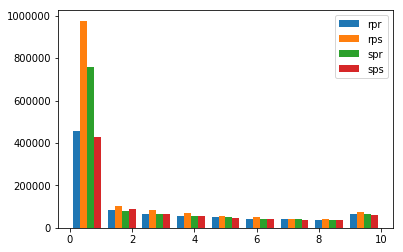

In [45]:
# share axis
from matplotlib import pyplot
rs_cols = df[['receiver_prev_received', 'receiver_prev_sent', 'sender_prev_received', 'sender_prev_sent']]
bins = numpy.linspace(rs_cols.min().min(),10, 10)

pyplot.hist(rs_cols.values, bins, alpha=1, label=['rpr','rps','spr','sps'])
# pyplot.hist(df['sender_prev_sent'], alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()


What we can see in this plot is that for any gratitude it's more common that the recevier has previously sent 0, and least that the sender has previously sent 0.
But the distributions are similar thereafter. My hypothesis is that users learn about gratitude through receiving it (which is why it's most common for the receiver to have 0), and since there are a few people sending the most of the gratitude, its less likely that this is the sender's first time sending gratitude.

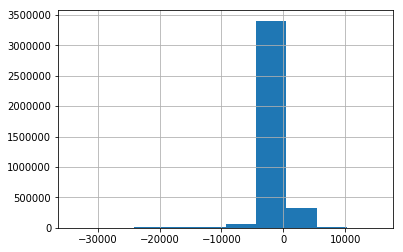

In [46]:
df['receiver_received_min_sender_sent'] = df['receiver_prev_received'] - df['sender_prev_sent']
df['receiver_received_min_sender_sent'].hist()

more weight on the left means that there are more exeperienced senders sending to unexperienced receivers

## Average number of previous edits for sender or receiver at each gratitude (2d- 2 scatterplots x-rpr, y-rpe && x-sps x-spe)

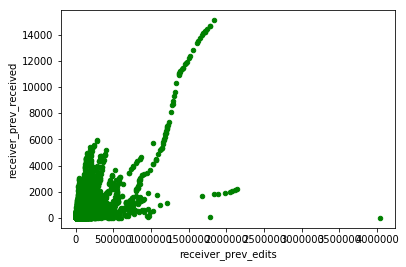

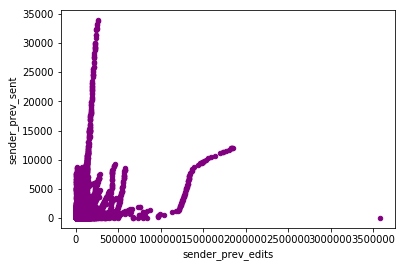

In [47]:
for y, x, c, title in (('receiver_prev_received', 'receiver_prev_edits', 'green', 'Receiver gratitudes by previously edits'), 
                ('sender_prev_sent', 'sender_prev_edits', 'purple', 'Sent gratitude by edits')):
    subdf = df[[x, y]].sample(frac=0.005)
    subdf.plot(kind='scatter', x=x, y=y, c=c)
    plt.show()

Analysis. I was interseted in the linearity of these plots. People seem to get as many gratitudes in line with how many edits they've made. On the other hand people seem to send more gratitude at a faster pace than they edit.

## Number of previous edits at first thank or love (over-time)
Are people being thanked earlier as the features mature.

In [48]:
first_grat = df[df['receiver_prev_received_indicator']==False]

In [49]:
first_grat['timestamp'].min()

Timestamp('2011-06-30 18:34:30')

In [50]:
first_grat['receiver_prev_edits'].min()

0

In [51]:
first_grat['month'] = first_grat['timestamp'].apply(lambda x: (x.year, x.month))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
month_first_grat = first_grat.groupby('month').agg({'receiver_prev_edits':mean})

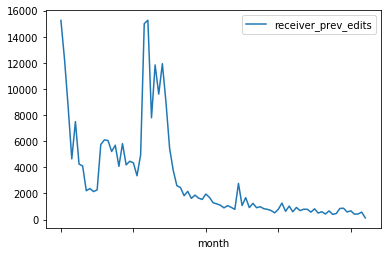

In [53]:
month_first_grat.plot()

Analysis. It does look like as the features mature, the first gratitude is coming closer to people with less edit experience.

## Histograms of thank another, each of the time series overlapping
### same technique three times for sender edits, receiver edits, and thank another

In [54]:
receiver_edit_after_cols = df[['receiver_edits_1d_after', 'receiver_edits_30d_after', 'receiver_edits_90d_after', 'receiver_edits_180d_after']].mean()
sender_edit_after_cols = df[['sender_edits_1d_after', 'sender_edits_30d_after', 'sender_edits_90d_after', 'sender_edits_180d_after']].mean()
receiver_gratitude_after_cols = df[['receiver_gratitude_another_1d_after', 'receiver_gratitude_another_30d_after', 'receiver_gratitude_another_90d_after', 'receiver_gratitude_another_180d_after']].mean()

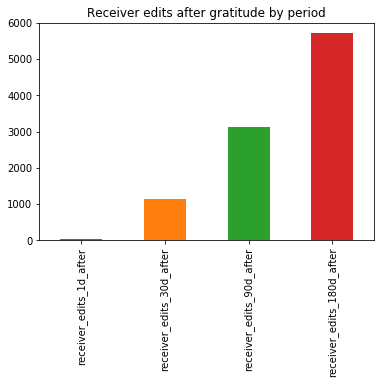

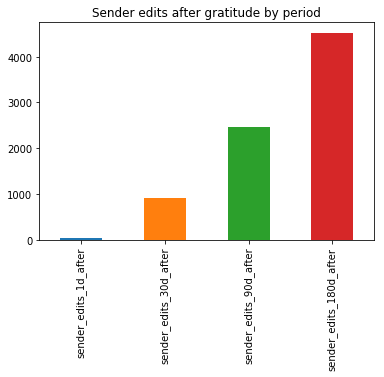

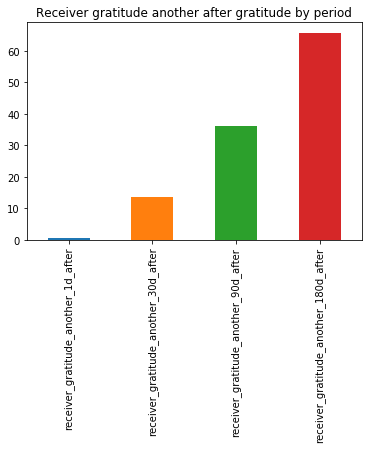

In [55]:
for subdf, title in [(receiver_edit_after_cols, 'Receiver edits after gratitude by period'),
                     (sender_edit_after_cols, 'Sender edits after gratitude by period'),
                     (receiver_gratitude_after_cols, 'Receiver gratitude another after gratitude by period'),
                    ]:
        subdf.plot(kind='bar', title=title)
        plt.show()
# i should do this in ggplot with faceting

Analysis. Well I expected these to look more different than they do. Visually, all these independent variables seem to react approximately equally to gratitude. Hrmm? I would have thought that receiver edits would have spiked sooner.

## Preparing a dataframe for output for the grand croissant hypothesis.

Dataframe for main analysis:
* Existing thanks & love dataframes, which have been filtered to only include:
* First thanks/love
New column: 
* recalculate the number of future thanks/love that aren't reciprocial to the sender


In [56]:
from collections import defaultdict

lovedf = df[df['gratitude']=='love']

In [57]:
#need to do this perlanguage and then glue-back?
love_langs = lovedf.groupby('lang')

In [59]:
def add_recip(langdf):
    def is_reciprocal(row):
        time_cond = langdf['timestamp'] < row['timestamp']
        recip_cond1 = langdf['sender_id'] == row['receiver_id']
        recip_cond2 = langdf['receiver_id'] == row['sender_id']
        nonself_cond = langdf['sender_id'] != langdf['receiver_id'] #surprisingly a lot of people do this
        reciprocations = langdf[(time_cond) & (recip_cond1) & (recip_cond2) & (nonself_cond)]
        return False if len(reciprocations)==0 else True
    langdf['is_reciprocal'] = langdf.apply(is_reciprocal, axis=1)
    return langdf

with_recip = {}
for lang, df in love_langs:
    with_recip[lang] = add_recip(df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [60]:
for lang, langdf in with_recip.items():
    recips = langdf[langdf['is_reciprocal']==True]
    print(f'{lang} is {"%0.2f" % (len(recips)/len(langdf)) } frac reciprocal')

ar is 0.11 frac reciprocal
bn is 0.04 frac reciprocal
en is 0.05 frac reciprocal
es is 0.02 frac reciprocal
fa is 0.09 frac reciprocal
he is 0.07 frac reciprocal
hu is 0.01 frac reciprocal
ko is 0.03 frac reciprocal
no is 0.05 frac reciprocal
pt is 0.06 frac reciprocal
sv is 0.01 frac reciprocal
tr is 0.07 frac reciprocal
uk is 0.01 frac reciprocal
vi is 0.19 frac reciprocal


Dataframe for main analysis:
Existing thanks & love dataframes, which have been filtered to only include:
First thanks/love
New column: 
recalculate the number of future thanks/love that aren't reciprocial to the sender
